**LABORATORIO 2**

*   Dataset:https://drive.google.com/file/d/1Brkgq35abJeW1fpZqmuWSDLNdj2wIh4r/view?usp=sharing
*   repositorio github:https://github.com/R1mber/sis421/tree/master/Laboratorios





In [ ]:
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/inteligencia_artificial/ia2/laboratorio/laboratorio 2/dataset_ropa.zip", "dataset_ropa.zip")

'dataset_ropa.zip'

In [ ]:
shutil.unpack_archive("dataset_ropa.zip")

In [ ]:
path_train = '/content/train/'
path_test = '/content/test/'
directorios_train = os.listdir(path_train)
directorios_test = os.listdir(path_test)
directorios_test , directorios_train

(['vestido', '.ipynb_checkpoints', 'camisa', 'cortos', 'sudadera'],
 ['vestido', 'camisa', 'cortos', 'sudadera'])

In [ ]:
labels_def = {'vestido':0, 'camisa':1, 'cortos':2, 'sudadera':3}

In [ ]:
def loadImages(path, directorio):
    labels = []
    images = []
    for d in directorio:
        imagenes = os.listdir(path + d)
        for i in imagenes:
            imgPath2 = path + d + '/' + i
            img1 = Image.open(imgPath2)
            new_img = img1.resize((50,50))
            images.append(np.array(new_img)/255)
            labels.append(labels_def[d])
    return images, labels


In [ ]:
images_train , labels_train = loadImages(path_train,directorios_train)
images_test , labels_test = loadImages(path_test,directorios_test)

In [ ]:
X_test= np.asarray(images_test)
y_test = np.asarray(labels_test)
x = np.asarray(images_train)
y = np.asarray(labels_train)

In [ ]:
X_test.shape, x.shape

((19, 50, 50, 3), (6535, 50, 50, 3))

camisa


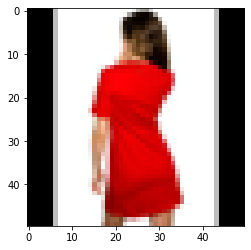

In [ ]:
def getText(label):
    for key in labels_def:
      if labels_def[key] == label:
        print(key)

def printImage(imageId):
  label = y[imageId]
  plt.imshow(x[imageId])
  getText(label)
printImage(4000)

In [ ]:
dims = x.shape[1] * x.shape[2] * x.shape[3]
x = x.reshape(x.shape[0], dims)

In [ ]:
dims2 = X_test.shape[1] * X_test.shape[2] * X_test.shape[3]
X_test = X_test.reshape(X_test.shape[0], dims2)


In [ ]:
x.shape, y.shape

((6535, 7500), (6535,))

In [ ]:
# creamos una clase que hereda de `torch.nn.Module`
class Model(torch.nn.Module):
    
    # constructor
    def __init__(self, D_in, H, D_out):
        
        # llamamos al constructor de la clase madre
        super(Model, self).__init__()
        
        # definimos nuestras capas
        self.fc1 = torch.nn.Linear(D_in, H)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(H, D_out)
        
    # lógica para calcular las salidas de la red
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# función de pérdida y derivada

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate(x):
    model.eval()
    y_pred = model(x)
    y_probas = softmax(y_pred)
    return torch.argmax(y_probas, axis=1)


In [ ]:
#x_2=np.array(x)
#y_2=np.array(y)
model = Model(7500, 300, 4)
outputs = model(torch.randn(64, 7500))
outputs.shape

torch.Size([64, 4])

In [ ]:
X_t = torch.from_numpy(x).float().cuda()
Y_t = torch.from_numpy(y).long().cuda()

In [ ]:
model.to("cuda")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epochs = 1000
log_each = 100
l = []
model.train()
for e in range(1, epochs+1): 
    
    # forward
    y_pred = model(X_t)

    # loss
    loss = criterion(y_pred, Y_t)
    l.append(loss.item())
    
    # ponemos a cero los gradientes
    optimizer.zero_grad()

    # Backprop (calculamos todos los gradientes automáticamente)
    loss.backward()

    # update de los pesos
    optimizer.step()
    
    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")
        
y_pred = evaluate(torch.from_numpy(X_test).float().cuda())
accuracy_score(y_test, y_pred.cpu().numpy())

Epoch 100/1000 Loss 0.89019
Epoch 200/1000 Loss 0.72344
Epoch 300/1000 Loss 0.62480
Epoch 400/1000 Loss 0.56064
Epoch 500/1000 Loss 0.50901
Epoch 600/1000 Loss 0.46914
Epoch 700/1000 Loss 0.43716
Epoch 800/1000 Loss 0.40964
Epoch 900/1000 Loss 0.38598
Epoch 1000/1000 Loss 0.36524


0.8947368421052632

In [ ]:
y_pred

tensor([0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3],
       device='cuda:0')

In [ ]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3])